In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
loans = pd.read_csv(r'C:\Users\vimalson\Downloads\lending_club_new_data.csv')

In [4]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,0,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,1,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,0,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,0,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,0,4,6,0.8,1,5.21533


In [5]:
loans['good_loans'] = loans['bad_loans'].apply(lambda y : 'yes' if y==0 else 'no')

In [6]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio,good_loans
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,171.62,0,11,5,0.4,1,8.14350,yes
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,117.08,1.11,119.66,1,1,4,0.8,1,2.39320,no
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,649.91,0,11,4,1.0,1,8.25955,yes
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,0.00,0.00,357.48,0,11,4,0.2,1,8.27585,yes
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,161.03,0,4,6,0.8,1,5.21533,yes


In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 25 columns):
loan_amnt                  9516 non-null int64
funded_amnt                9516 non-null int64
funded_amnt_inv            9516 non-null int64
int_rate                   9516 non-null float64
installment                9516 non-null float64
annual_inc                 9516 non-null int64
dti                        9516 non-null float64
delinq_2yrs                9516 non-null int64
inq_last_6mths             9516 non-null int64
open_acc                   9516 non-null int64
total_pymnt                9516 non-null float64
total_pymnt_inv            9516 non-null float64
total_rec_prncp            9516 non-null float64
total_rec_int              9516 non-null float64
total_rec_late_fee         9516 non-null float64
recoveries                 9516 non-null float64
collection_recovery_fee    9516 non-null float64
last_pymnt_amnt            9516 non-null float64
bad_loans                

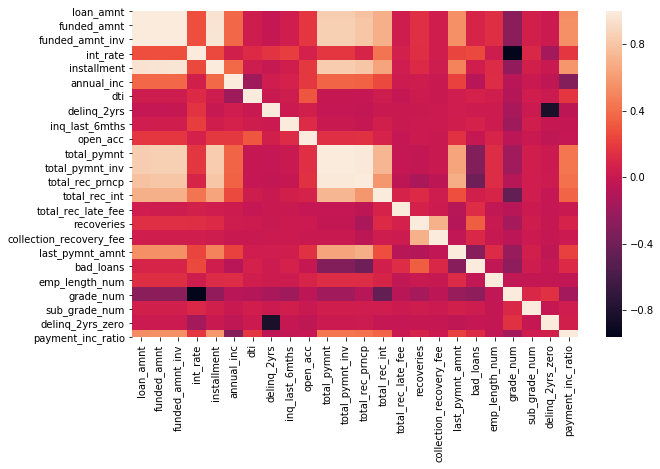

In [8]:
plt.figure(figsize =(10,6))
sns.heatmap(loans.corr())

In [9]:
#Building a Decision Tree classifier

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = loans.drop(['bad_loans','good_loans'],axis=1)

In [12]:
y = loans['good_loans']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=222)

In [14]:
X_train.shape,X_test.shape

((6661, 23), (2855, 23))

In [15]:
y_train.shape,y_test.shape

((6661,), (2855,))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
prediction = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.97      0.98      0.97       457
         yes       1.00      0.99      0.99      2398

    accuracy                           0.99      2855
   macro avg       0.98      0.98      0.98      2855
weighted avg       0.99      0.99      0.99      2855



In [22]:
print(confusion_matrix(y_test,prediction))

[[ 446   11]
 [  16 2382]]


In [23]:
#Building a Random Forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(n_estimators=150)

In [26]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rf_preidction = rf_model.predict(X_test)

In [28]:
print(classification_report(y_test,rf_preidction))

              precision    recall  f1-score   support

          no       1.00      0.98      0.99       457
         yes       1.00      1.00      1.00      2398

    accuracy                           1.00      2855
   macro avg       1.00      0.99      0.99      2855
weighted avg       1.00      1.00      1.00      2855



In [29]:
print(confusion_matrix(y_test,rf_preidction))

[[ 448    9]
 [   0 2398]]
